In [1]:
import pandas as pd

DATASET_FILENAME = 'training.1600000.processed.noemoticon.csv'

tweet_df = pd.read_csv(DATASET_FILENAME, header=None, encoding='latin')
tweet_df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [2]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [3]:
tweet_df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
tweet_df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


- `text` feature 필요한 전처리
  - 감정 분석과 상관 없는 멘션과 링크 제거
  - 대소문자 통일
  - 의성어, 줄임말, 약어 통일

In [4]:
tweet_df.drop(['ids', 'date', 'flag', 'user'], axis=1, inplace=True)
tweet_df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
text_length_s = tweet_df['text'].map(len)
print('min:', text_length_s.min())
print('mean:', text_length_s.mean())
print('max:', text_length_s.max())

min: 6
mean: 74.09011125
max: 374


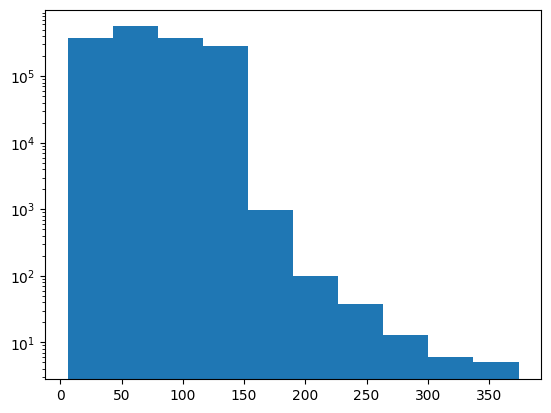

In [6]:
import matplotlib.pyplot as plt


plt.hist(text_length_s)
plt.yscale('log')
plt.show()

In [7]:
text = tweet_df['text'][0]
print(text)

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [8]:
tweet_df.groupby('target').count()

,text
target,
0,800000
4,800000


In [9]:
positive_df = tweet_df[tweet_df['target'] == 4]
negative_df = tweet_df[tweet_df['target'] == 0]

print('pos:', positive_df.shape[0])
print('neg:', negative_df.shape[0])

pos: 800000
neg: 800000


In [10]:
from collections import Counter
from wordcloud import WordCloud

wc = WordCloud()

positive_samples_df = positive_df.sample(frac=0.1)
negative_samples_df = negative_df.sample(frac=0.1)

pos_freq = Counter()
#for text in positive_samples_df['text']:
#    pos_freq.update(wc.process_text(text))
pos_str = ''
for text in positive_samples_df['text']:
    pos_str += text + '\n'
pos_freq = Counter(wc.process_text(pos_str))

neg_freq = Counter()
#for text in negative_samples_df['text']:
#    neg_freq.update(wc.process_text(text))
neg_str = ''
for text in negative_samples_df['text']:
    neg_str += text + '\n'
neg_freq = Counter(wc.process_text(neg_str))


pos_freq = dict(pos_freq.most_common(200))
neg_freq = dict(neg_freq.most_common(200))

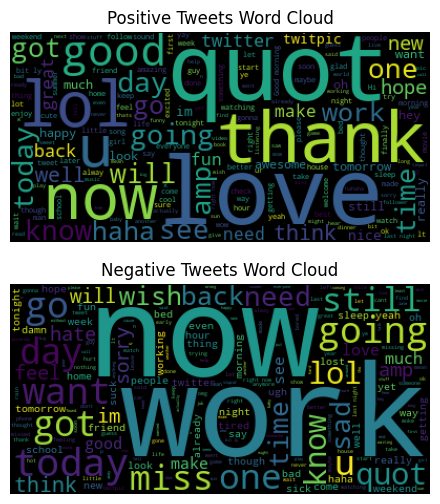

In [11]:
import matplotlib.pyplot as plt


_, axs = plt.subplots(2, 1, figsize=(12, 6))

axs[0].imshow(wc.generate_from_frequencies(pos_freq))
axs[0].set_title('Positive Tweets Word Cloud')
axs[0].axis('off')

axs[1].imshow(wc.generate_from_frequencies(neg_freq))
axs[1].set_title('Negative Tweets Word Cloud')
axs[1].axis('off')

plt.show()

In [12]:
wc.to_file('test.png')